In [7]:
import glob
import os
import json
import xml.etree.ElementTree as et
import pandas as pd
import soundfile as sf
import numpy as np
from pathlib import Path
import itertools
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Get an Array of all 0's and 1's based on annotation and the total audio length
def get_binary_list(segment_path,total_dur):
    tree = et.parse(segment_path)
    root = tree.getroot()
    # Create an array of all zeros and length total_dur
    segs_arr = np.zeros(total_dur)
    # convert second string to milliseccond int
    segs = [[
        elem.attrib["transcriber_start"],
        elem.attrib["transcriber_end"],
    ] for elem in root.iter("segment")]
    for dur in segs:
        dur[0] = int(float(dur[0]) * 1000)
        dur[1] = int(float(dur[1]) * 1000)
    # Set the value on the array corresponding to the position of each interval in segs to 1
    for seg in segs:
        start_seg = seg[0]
        end_seg = seg[1] + 1
        segs_arr[start_seg:end_seg] = 1
    return segs_arr

In [9]:
# Get respectively the list of length statistics for 1, 2, 3, and 4 people talking at the same time based on all annotations and reference audio
def get_overlap_statistics(seg_path_list,ref_audio_path):
    ref_audio, fs = sf.read(
        ref_audio_path,
        dtype="float32",
    )
    total_dur = int(len(ref_audio) / fs * 1000)
    # Add up the binary list of all sources, if the value of a position is 1, 2, 3 or 4, then there are 1, 2, 3 and 4 people talking at this moment respectively
    for index in range(len(seg_path_list)):
        seg_path = seg_path_list[index]
        seg_list = get_binary_list(seg_path,total_dur)
        if index == 0:
            seg_overlap = seg_list
        else:
            seg_overlap+=seg_list
    ovlSpk_num_list = [1,2,3,4]
    # cnt1 = seg_overlap.count(1)
    # cnt2 = seg_overlap.count(2)
    # cnt3 = seg_overlap.count(3)
    # cnt4 = seg_overlap.count(4)
    # count = [seg_overlap.count(num) for num in ovlSpk_num_list]
    count = Counter(seg_overlap)
    overlap_list = []
    # For each type of overlap, count the duration of each overlap and generate a list
    for ovlSpk_num in ovlSpk_num_list:
        overlap = [len(list(v)) for k, v in itertools.groupby(seg_overlap) if k==ovlSpk_num]
        overlap_list.append(overlap)
    return overlap_list,count,total_dur


In [55]:
# segment_path_h0 = "/Users/ccui/Desktop/AMI_sample/annotations/segments/ES2009a.A.segments.xml"
# segment_path_h1 = "/Users/ccui/Desktop/AMI_sample/annotations/segments/ES2009a.B.segments.xml"
# segment_path_h2 = "/Users/ccui/Desktop/AMI_sample/annotations/segments/ES2009a.C.segments.xml"
# segment_path_h3 = "/Users/ccui/Desktop/AMI_sample/annotations/segments/ES2009a.D.segments.xml"
# ref_audio_path = "/Users/ccui/Desktop/AMI_sample/amicorpus/ES2009a/audio/ES2009a.Headset-0.wav"

# ref_audio, fs = sf.read(
#         ref_audio_path,
#         dtype="float32",
#     )
# total_dur = int(len(ref_audio) / fs * 1000)
# seg_list_h0 = get_binary_list(segment_path_h0,total_dur)
# seg_list_h1 = get_binary_list(segment_path_h1,total_dur)
# seg_list_h2 = get_binary_list(segment_path_h2,total_dur)
# seg_list_h3 = get_binary_list(segment_path_h3,total_dur)



In [3]:
# seg_list1 = [1,1,0,1,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1]
# seg_list2 = [0,1,1,0,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0]
# print(len(seg_list1))
# seg_overlap = [i + j for i, j in zip(seg_list1, seg_list2)]
# print(seg_overlap)
# overlap2 = [len(list(v)) for k, v in itertools.groupby(seg_overlap) if k==2]
# print(overlap2)
# count_overlap2 = {x: overlap2.count(x) for x in set(overlap2)}
# print(count_overlap2)


19
[1, 2, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1]
[1, 3, 1]
{1: 2, 3: 1}


In [56]:
# seg_overlap = seg_list_h0 + seg_list_h1 + seg_list_h2 +seg_list_h3
# one_speaker = [len(list(v)) for k, v in itertools.groupby(seg_overlap) if k==1]
# overlap2 = [len(list(v)) for k, v in itertools.groupby(seg_overlap) if k==2]
# overlap3 = [len(list(v)) for k, v in itertools.groupby(seg_overlap) if k==3]
# overlap4 = [len(list(v)) for k, v in itertools.groupby(seg_overlap) if k==4]

# count_one_speaker = {x: one_speaker.count(x) for x in set(one_speaker)}
# count_overlap2 = {x: overlap2.count(x) for x in set(overlap2)}
# count_overlap3 = {x: overlap3.count(x) for x in set(overlap3)}
# count_overlap4 = {x: overlap4.count(x) for x in set(overlap4)}

In [19]:
audio_path = "/Users/ccui/Desktop/AMI_sample/amicorpus"
segment_path = "/Users/ccui/Desktop/AMI_sample/annotations/segments"
folder_list = glob.glob(os.path.join(audio_path, "*"))
segment_list = glob.glob(os.path.join(segment_path, "*"))
ref_audio_path = "/Users/ccui/Desktop/AMI_sample/amicorpus/ES2009a/audio/ES2009a.Headset-0.wav"
for index in range(len(folder_list)):
    folder = folder_list[index]
    wavs = glob.glob(os.path.join(folder, "audio/*"))
    meeting_name = Path(folder).stem.split(".")[-1]
    ref_audio_path = os.path.join(audio_path, meeting_name,"audio",meeting_name+".Headset-0.wav")
    seg_path_list = []
    for segment in segment_list:
        seg_meeting_name = Path(segment).stem.split(".")[0]
        if seg_meeting_name == meeting_name:
            seg_path_list.append(str(Path(segment)))
    overlap_list, count, total_dur = get_overlap_statistics(
        seg_path_list, ref_audio_path)
    if index == 0:
        count_all = count
    else:
        count_all += count
    if index == 0:
        overlap_all_num = overlap_list
    else:
        for idx in range(len(overlap_list)):
            overlap = overlap_list[idx]
            overlap_all_num[idx].extend(overlap)
statistics = []
for overlap_all in overlap_all_num:
    statistics.append(overlap_all)

with open('count_overlap.json', "w") as f:
    json.dump(count_all, f, indent=4)

In [7]:
with open('statistics.json', "r") as f:
        statistics = json.load(f)

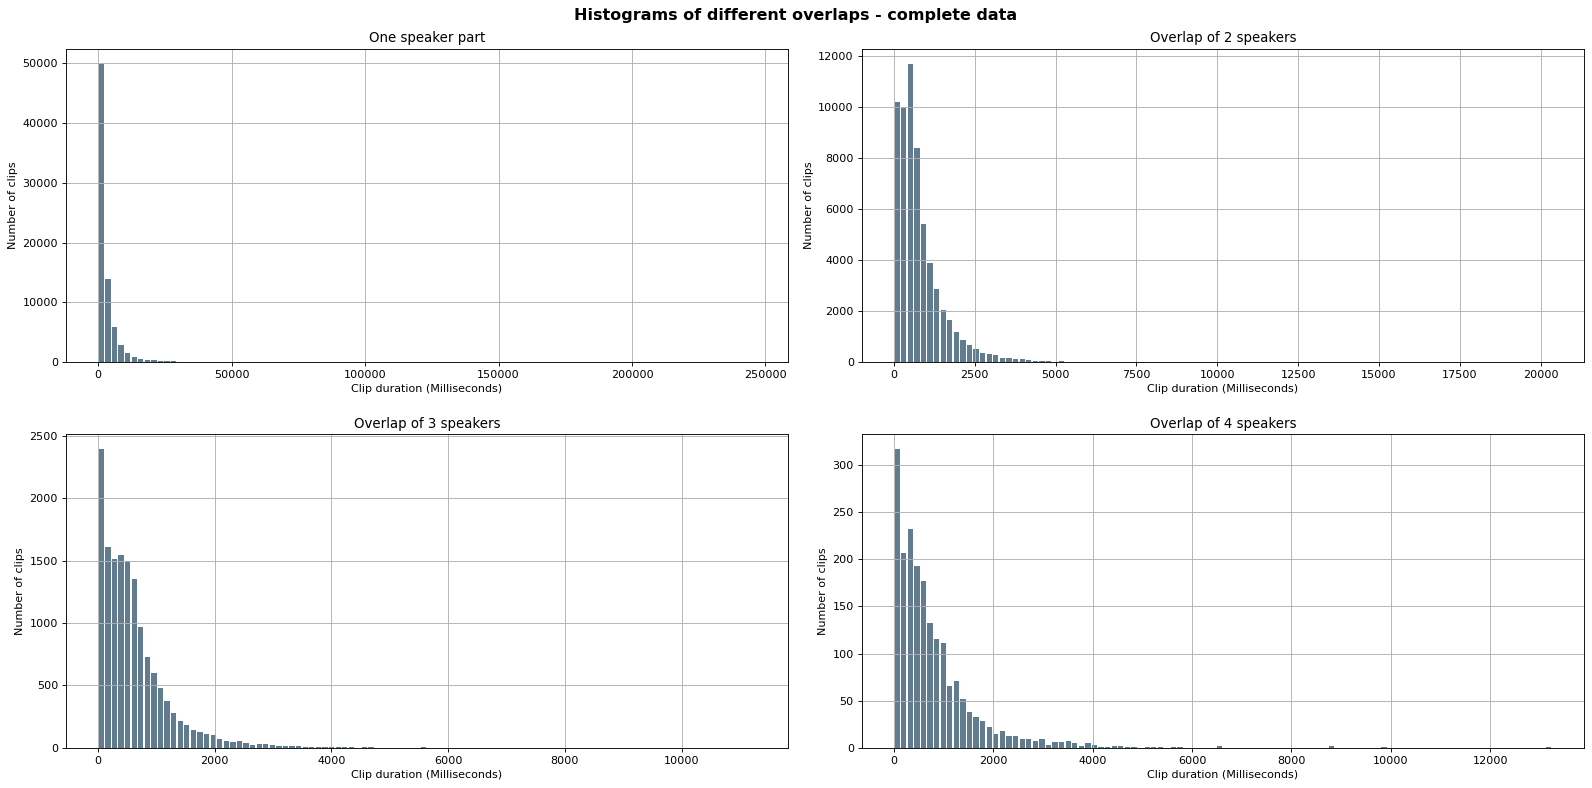

In [34]:
fig = plt.figure(figsize=(20,10),dpi=80)
num_subplot = 221
for index in range(len(statistics)):
    plt.subplot(num_subplot)
    num_OvlSpk = index+1
    overlap = pd.Series(statistics[index])
    overlap.plot.hist(grid=True, bins=100, rwidth=0.8,
                   color='#607c8e')
    plt.xlabel('Clip duration (Milliseconds)')
    plt.ylabel('Number of clips')
    if num_OvlSpk == 1:
        plt.title('One speaker part')
    else:
        plt.title("Overlap of %s speakers"%num_OvlSpk)
    num_subplot+=1
plt.suptitle('Histograms of different overlaps - complete data',weight='bold',size='x-large')
fig.tight_layout(h_pad=2)
# plt.legend()
plt.show()

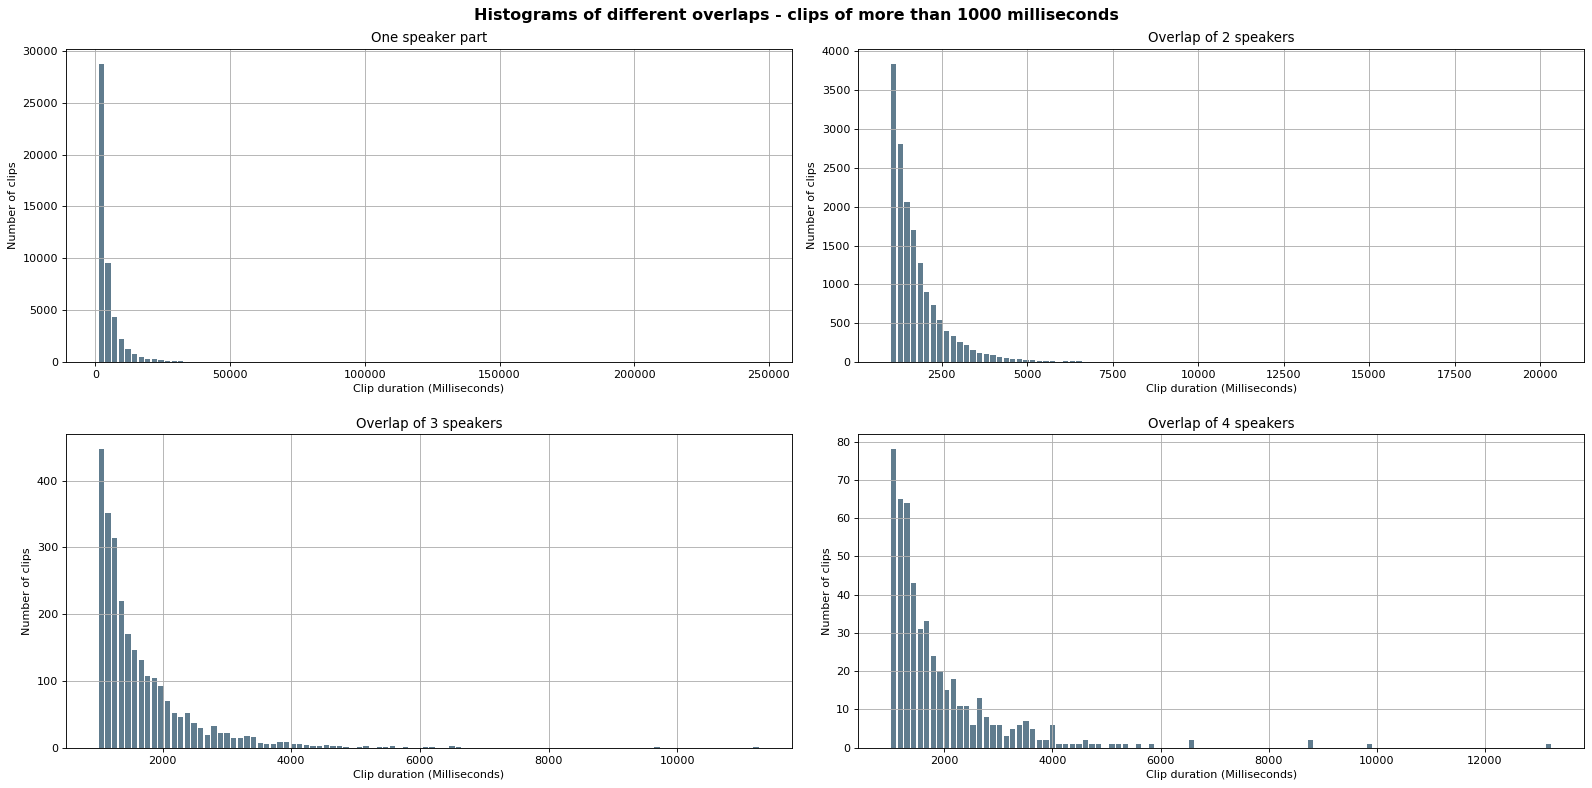

In [10]:
# All overlaps above one second
fig = plt.figure(figsize=(20,10),dpi=80)
num_subplot = 221
for index in range(len(statistics)):
    plt.subplot(num_subplot)
    num_OvlSpk = index+1
    overlap = pd.Series([s for s in statistics[index] if s>=1000])
    overlap.plot.hist(grid=True, bins=100, rwidth=0.8,
                   color='#607c8e')
    # overlap.plot.hist(cumulative=1, histtype='step', bins=100, color='tab:orange')
    # plt.xlim(1000,)
    # plt.ylim(,max())
    plt.xlabel('Clip duration (Milliseconds)')
    plt.ylabel('Number of clips')
    if num_OvlSpk == 1:
        plt.title('One speaker part')
    else:
        plt.title("Overlap of %s speakers"%num_OvlSpk)
    num_subplot+=1
plt.suptitle('Histograms of different overlaps - clips of more than 1000 milliseconds',weight='bold',size='x-large')
fig.tight_layout(h_pad=2)
# plt.legend()
plt.show()

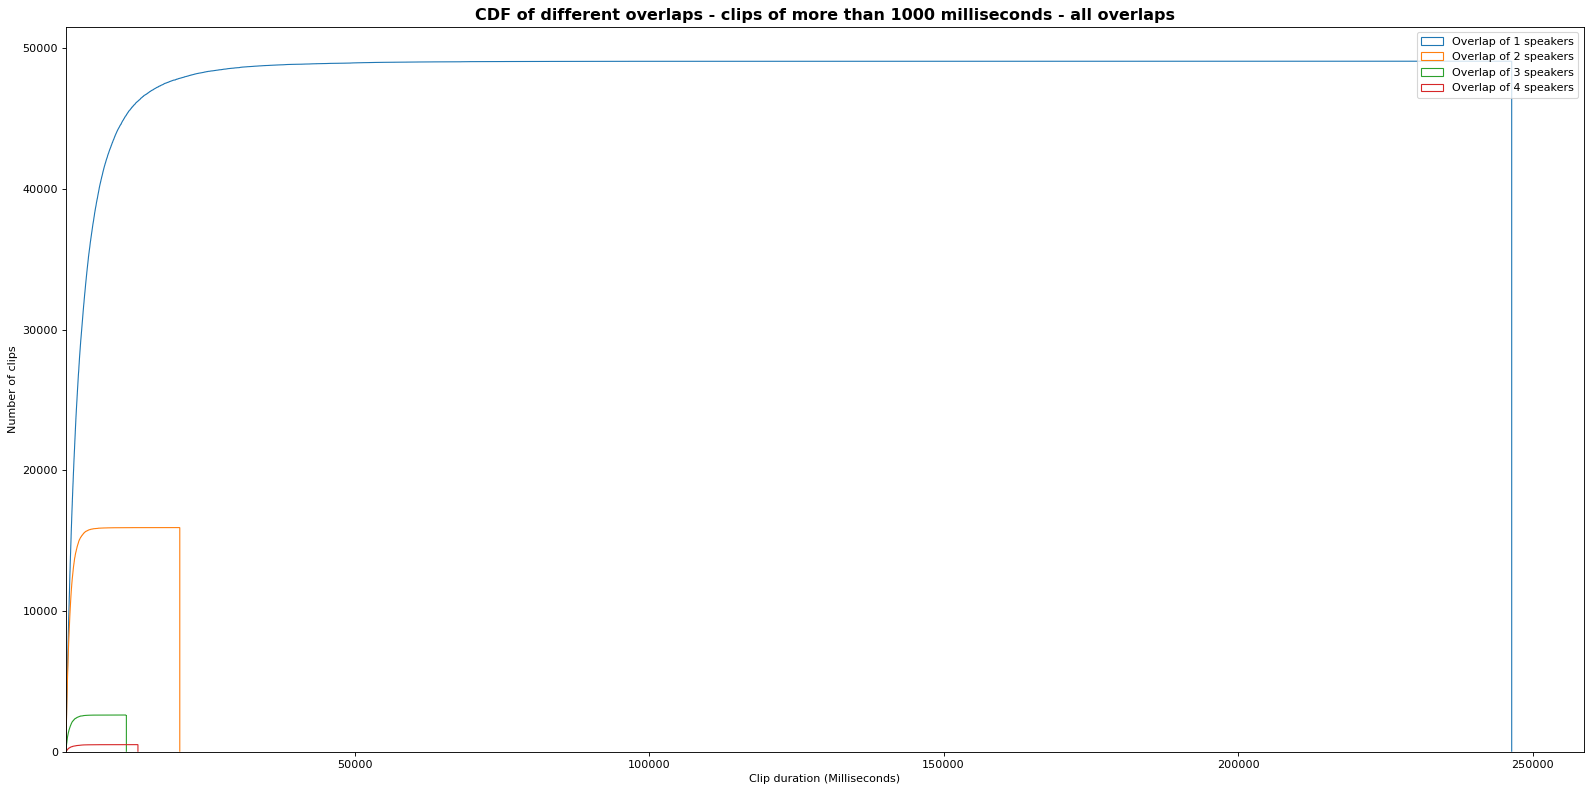

In [53]:
# CDF (Cumulative distribution function)
fig = plt.figure(figsize=(20,10),dpi=80)
for index in range(len(statistics)):
    num_OvlSpk = index+1
    overlap = pd.Series([s for s in statistics[index] if s>=1000])
    overlap.plot.hist(cumulative=1,
                      histtype='step',
                      bins=100000,
                      label="Overlap of %s speakers"%num_OvlSpk)
plt.xlim(1000,)
plt.xlabel('Clip duration (Milliseconds)')
plt.ylabel('Number of clips')
plt.title('CDF of different overlaps - clips of more than 1000 milliseconds - all overlaps',weight='bold',size='x-large')
fig.tight_layout(h_pad=2)
plt.legend()
plt.show()

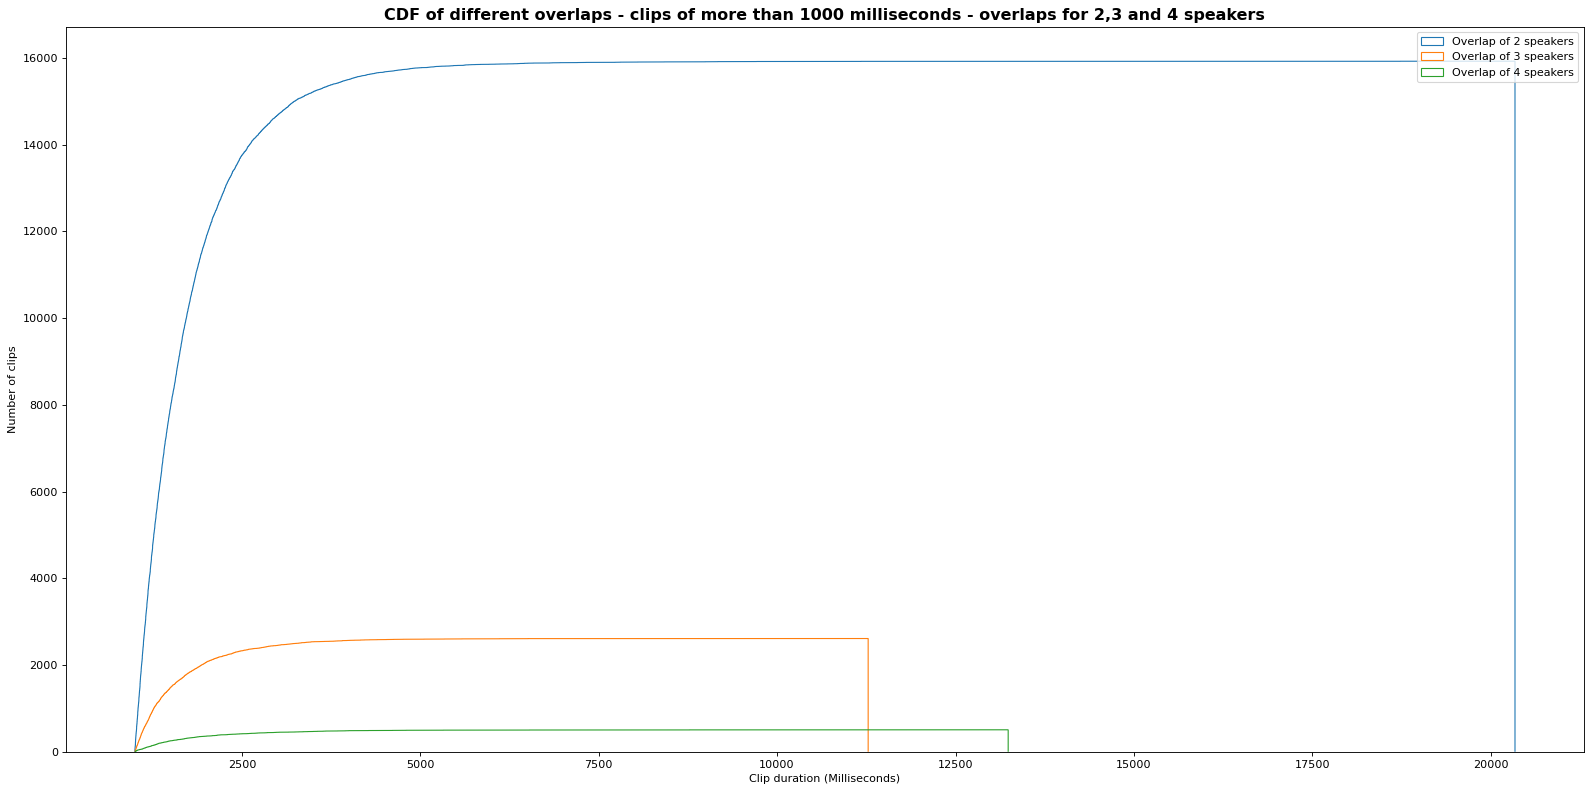

In [13]:
# CDF
fig = plt.figure(figsize=(20,10),dpi=80)
for index in range(1,len(statistics)):
    num_OvlSpk = index+1
    overlap = pd.Series([s for s in statistics[index] if s>=1000])
    overlap.plot.hist(cumulative=1,
                      histtype='step',
                      bins=100000,
                      label="Overlap of %s speakers"%num_OvlSpk)
# plt.xlim(1000,3000)
# plt.ylim(0,20000)
plt.xlabel('Clip duration (Milliseconds)')
plt.ylabel('Number of clips')
plt.title('CDF of different overlaps - clips of more than 1000 milliseconds - overlaps for 2,3 and 4 speakers',weight='bold',size='x-large')
fig.tight_layout(h_pad=2)
plt.legend()
plt.show()

In [3]:
with open('statistics_5.json', "r") as f:
        statistics_5 = json.load(f)

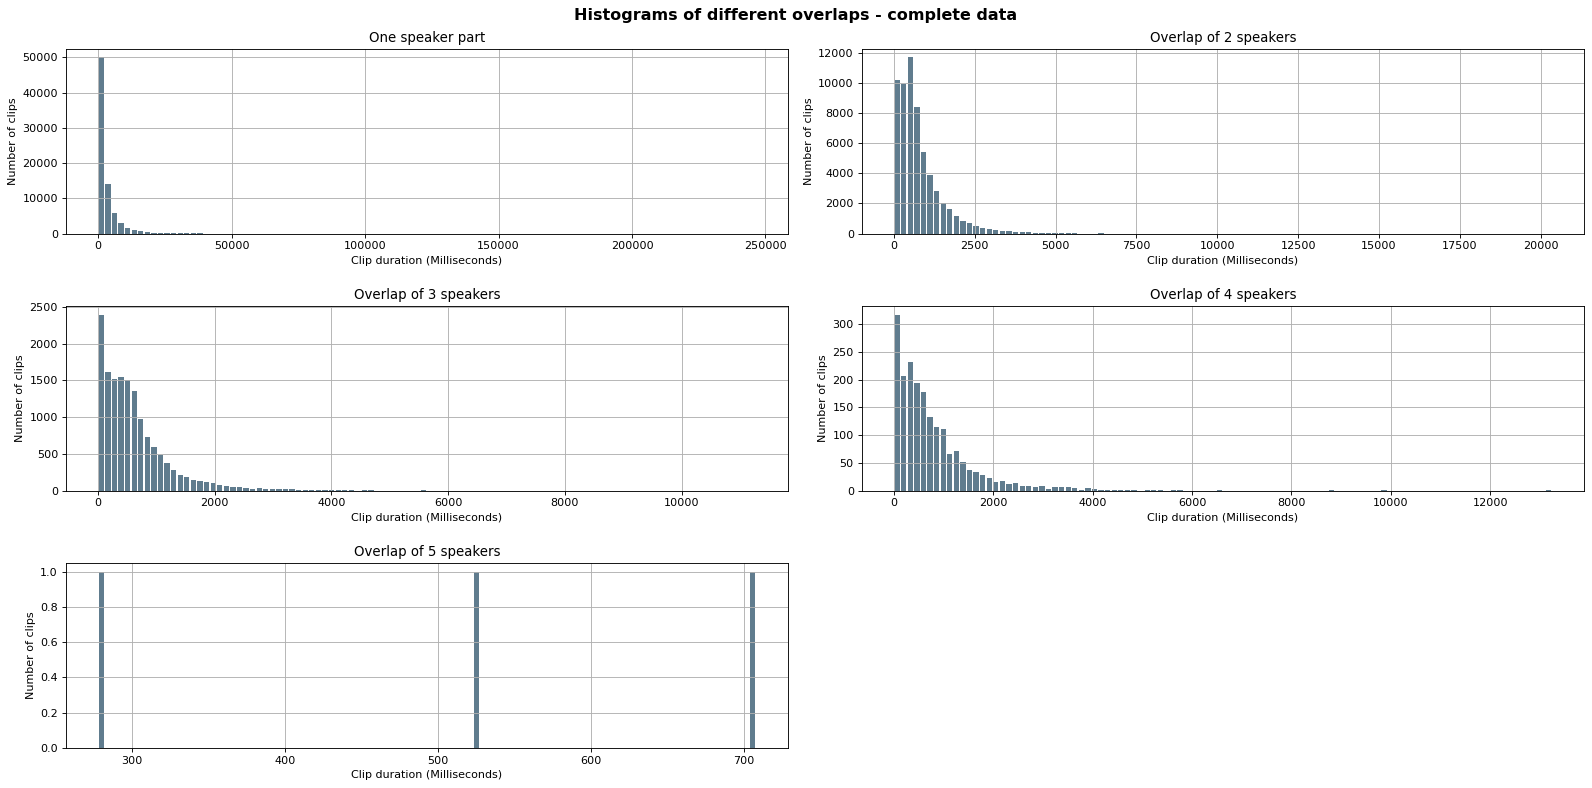

In [58]:
fig = plt.figure(figsize=(20, 10), dpi=80)
num_subplot = 321
for index in range(len(statistics_5)):
    plt.subplot(num_subplot)
    num_OvlSpk = index + 1
    overlap = pd.Series(statistics_5[index])
    overlap.plot.hist(grid=True, bins=100, rwidth=0.8, color='#607c8e')
    plt.xlabel('Clip duration (Milliseconds)')
    plt.ylabel('Number of clips')
    if num_OvlSpk == 1:
        plt.title('One speaker part')
    else:
        plt.title("Overlap of %s speakers" % num_OvlSpk)
    num_subplot += 1
plt.suptitle('Histograms of different overlaps - complete data',
             weight='bold',
             size='x-large')
fig.tight_layout(h_pad=2)
# plt.legend()
plt.show()

In [61]:
print(statistics_5[4])

[278, 708, 524]


In [23]:
with open('count_overlap.json', "r") as f:
    count_all = json.load(f)


In [25]:
total_dur_all = sum(count_all.values())
for num in count_all:
    print(f'The percentage of {num}\'s speakers overlap is {count_all[num] / total_dur_all}.')


The percentage of 0.0's speakers overlap is 0.1544966494087079.
The percentage of 1.0's speakers overlap is 0.6808152650908449.
The percentage of 2.0's speakers overlap is 0.13477051573253682.
The percentage of 3.0's speakers overlap is 0.025606002007015464.
The percentage of 4.0's speakers overlap is 0.0043073717393407734.
The percentage of 5.0's speakers overlap is 4.196021554112404e-06.
